In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-3/train.csv
/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv


In [3]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv"))
print(" The size of the data frame is = {}".format(df.size))

 The size of the data frame is = 135864


In [4]:
df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
22639,32705,NaN,Zimbabwe,2020-03-31,8.0,1.0
22640,32706,NaN,Zimbabwe,2020-04-01,8.0,1.0
22641,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0
22642,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0


In [5]:
df.describe()

,Id,ConfirmedCases,Fatalities
count,22644.000000,22644.000000,22644.000000
mean,16355.000000,655.267002,29.015412
std,9451.983632,5428.632429,382.138505
min,1.000000,0.000000,0.000000
25%,8169.750000,0.000000,0.000000
50%,16355.000000,0.000000,0.000000
75%,24540.250000,51.000000,0.000000
max,32709.000000,126168.000000,15362.000000


In [6]:
df['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects. 

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d") # Timestamp type

In [8]:
confirmed_cases_by_date = df.groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_by_date = confirmed_cases_by_date.join(fatalities_by_date)

In [9]:
print(confirmed_cases_by_date.shape)
print(fatalities_by_date.shape)
print(total_by_date.shape)

(74, 1)
(74, 1)
(74, 2)


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


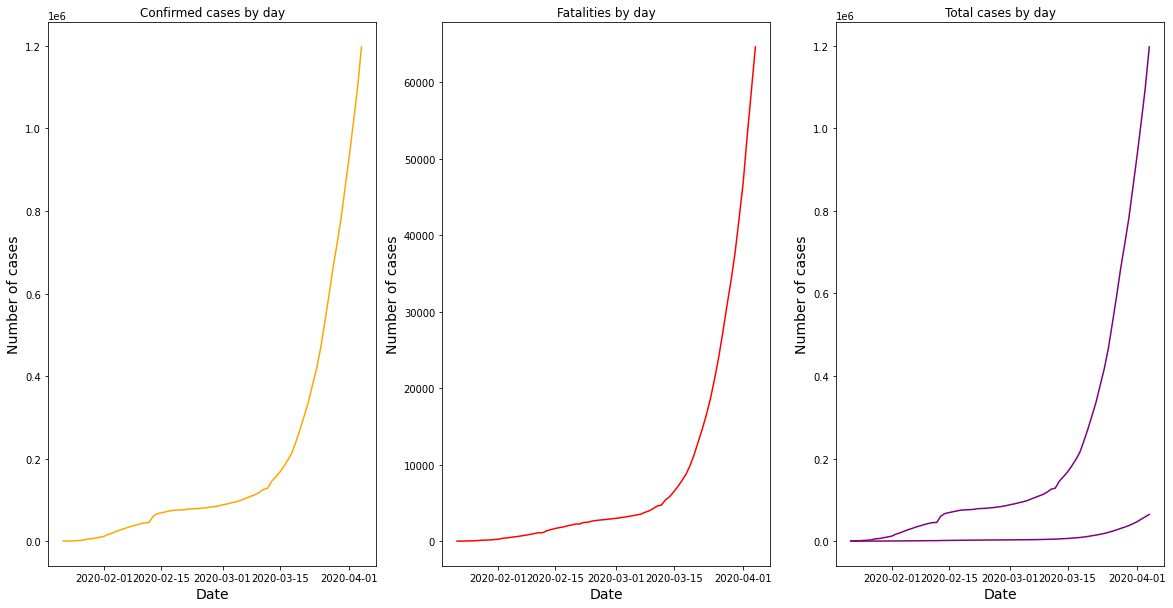

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date, color = 'orange')
ax1.set_title("Confirmed cases by day")
ax1.set_ylabel("Number of cases", size = 14)
ax1.set_xlabel("Date", size = 14)

ax2.plot(fatalities_by_date, color = 'red')
ax2.set_title("Fatalities by day")
ax2.set_ylabel("Number of cases", size = 14)
ax2.set_xlabel("Date", size = 14)

ax3.plot(total_by_date, color = 'purple')
ax3.set_title("Total cases by day")
ax3.set_ylabel("Number of cases", size = 14)
ax3.set_xlabel("Date", size = 14)

plt.show()


Considering COVID-19 started out in China, we shall examine it separately. Moreover, let's analyze the scenario separately in :
1. China
2. India
3. Italy
4. UK
5. USA
6. Taiwan

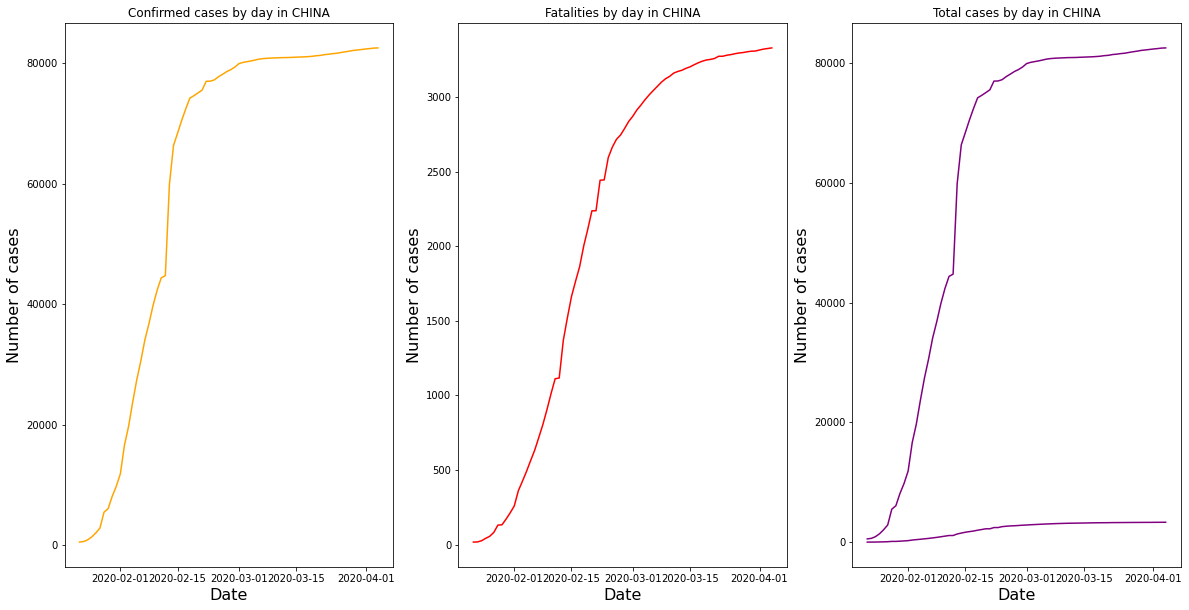

In [11]:
# CHINA
confirmed_cases_by_date_china = df[df['Country_Region'] == 'China'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_china = df[df['Country_Region'] == 'China'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_china = confirmed_cases_by_date_china.join(fatalities_by_date_china)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_china, color = 'orange')
ax1.set_title("Confirmed cases by day in CHINA")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_china, color = 'red')
ax2.set_title("Fatalities by day in CHINA")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_china, color = 'purple')
ax3.set_title("Total cases by day in CHINA")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

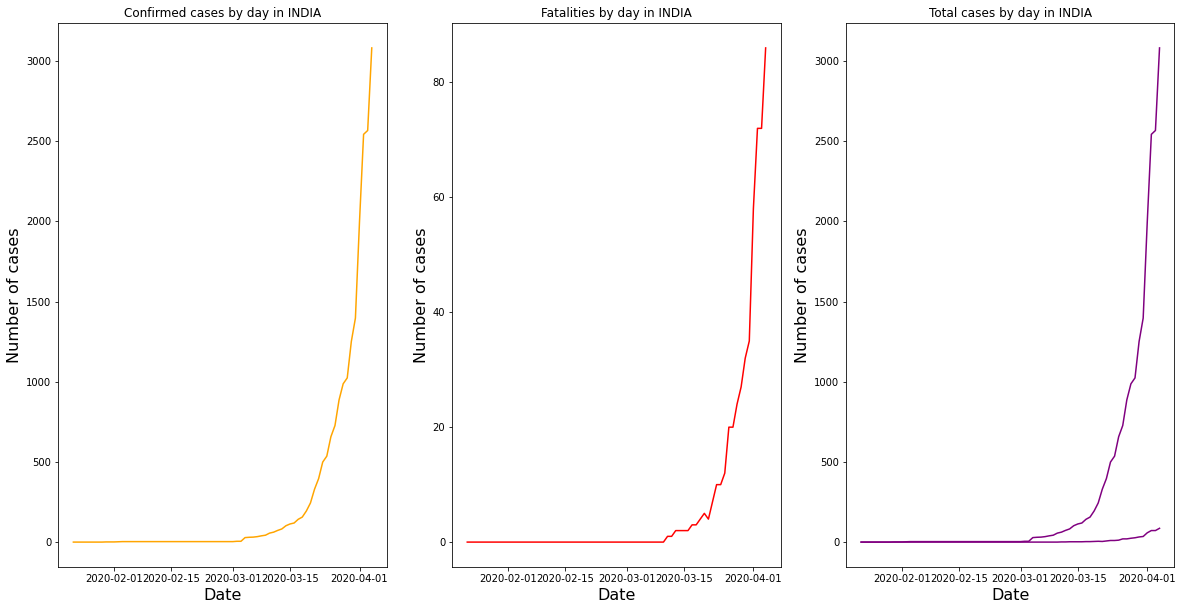

In [12]:
# INDIA
confirmed_cases_by_date_india = df[df['Country_Region'] == 'India'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_india = df[df['Country_Region'] == 'India'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_india = confirmed_cases_by_date_india.join(fatalities_by_date_india)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_india, color = 'orange')
ax1.set_title("Confirmed cases by day in INDIA")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_india, color = 'red')
ax2.set_title("Fatalities by day in INDIA")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_india, color = 'purple')
ax3.set_title("Total cases by day in INDIA")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

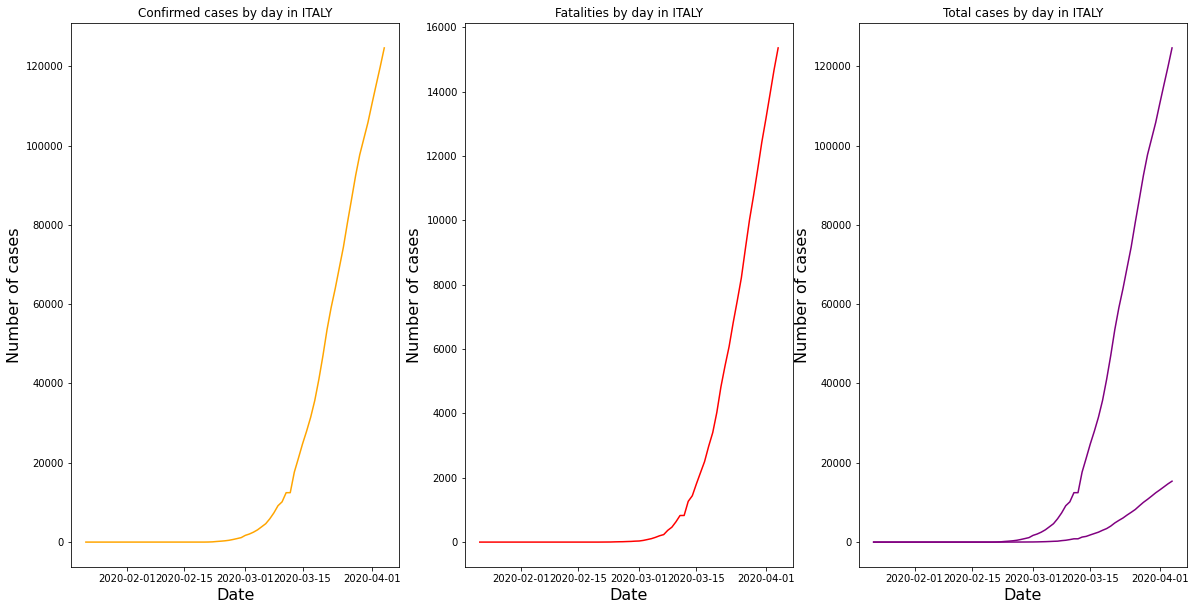

In [13]:
# ITALY
confirmed_cases_by_date_italy = df[df['Country_Region'] == 'Italy'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_italy = df[df['Country_Region'] == 'Italy'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_italy = confirmed_cases_by_date_italy.join(fatalities_by_date_italy)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_italy, color = 'orange')
ax1.set_title("Confirmed cases by day in ITALY")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_italy, color = 'red')
ax2.set_title("Fatalities by day in ITALY")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_italy, color = 'purple')
ax3.set_title("Total cases by day in ITALY")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

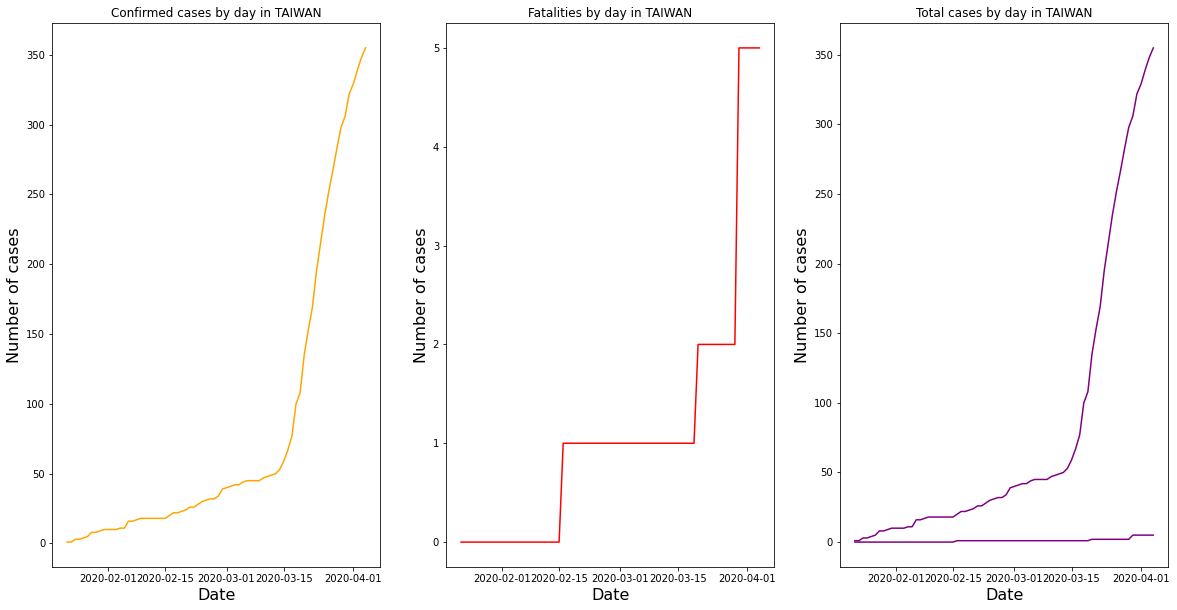

In [14]:
# Taiwan
confirmed_cases_by_date_taiwan = df[df['Country_Region'] == 'Taiwan*'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_taiwan = df[df['Country_Region'] == 'Taiwan*'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_taiwan = confirmed_cases_by_date_taiwan.join(fatalities_by_date_taiwan)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_taiwan, color = 'orange')
ax1.set_title("Confirmed cases by day in TAIWAN")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_taiwan, color = 'red')
ax2.set_title("Fatalities by day in TAIWAN")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_taiwan, color = 'purple')
ax3.set_title("Total cases by day in TAIWAN")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()